In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
credit = pd.read_csv("C:/Users/anoop/Downloads/archive (2)/tmdb_5000_movies.csv")
movies = pd.read_csv("C:/Users/anoop/Downloads/archive (2)/tmdb_5000_credits.csv")
print(movies_df.head())

   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3",

In [19]:
movies.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [25]:
credit.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [27]:
#Merge the both datasets
movies = movies.merge(credit, on='title')

In [29]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4809 non-null   int64  
 1   title                 4809 non-null   object 
 2   cast                  4809 non-null   object 
 3   crew                  4809 non-null   object 
 4   budget                4809 non-null   int64  
 5   genres                4809 non-null   object 
 6   homepage              1713 non-null   object 
 7   id                    4809 non-null   int64  
 8   keywords              4809 non-null   object 
 9   original_language     4809 non-null   object 
 10  original_title        4809 non-null   object 
 11  overview              4806 non-null   object 
 12  popularity            4809 non-null   float64
 13  production_companies  4809 non-null   object 
 14  production_countries  4809 non-null   object 
 15  release_date         

In [31]:
movies['original_language'].value_counts()

original_language
en    4510
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
ko      12
cn      12
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [33]:
movies.columns

Index(['movie_id', 'title', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'id', 'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'vote_average', 'vote_count'],
      dtype='object')

In [35]:
# Checking the percentage of missing values in the dataset
missing = movies.isnull().sum()
missing = missing[missing > 0]
missing_percentage = missing / movies.shape[0] * 100
missing_percentage

homepage        64.379289
overview         0.062383
release_date     0.020794
runtime          0.041589
tagline         17.550426
dtype: float64

In [37]:
# remove homepage, tagline columns
movies = movies.drop(['homepage', 'tagline'], axis=1)

In [39]:
# Fillup the missing values in the columns
movies['overview'] = movies['overview'].fillna('')
movies['release_date'] = movies['release_date'].fillna('')
movies['runtime'] = movies['runtime'].fillna('')

In [41]:
# Check the missing values again
movies.isnull().sum().sum()

0

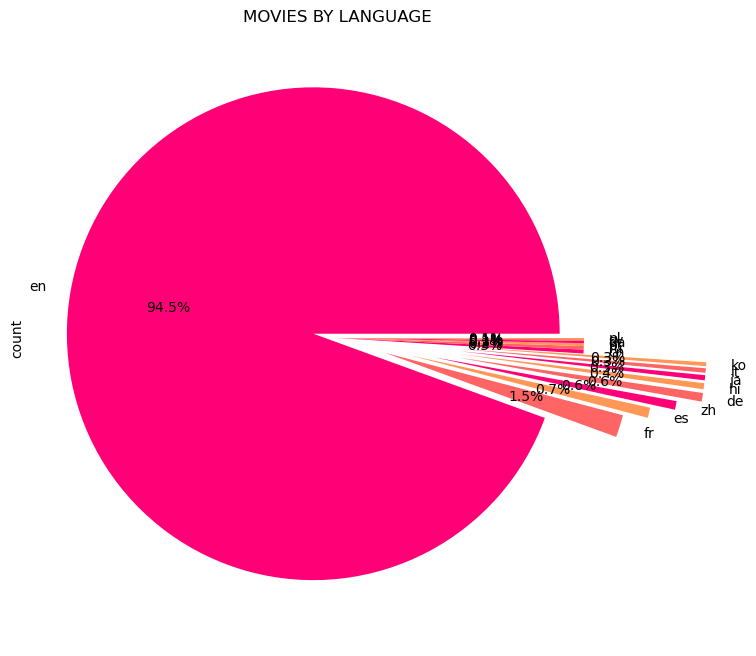

In [43]:
# Visualize the original_language column using pie chart and explode the top 15 languages

plt.figure(figsize=(8,8))
plt.title('MOVIES BY LANGUAGE')
colors = ['#ff0077', '#ff6565', '#ff9856']
movies['original_language'].value_counts().head(15).plot.pie(explode=[0.1,0.2,0.3,0.4,0.5,0.5,0.5,0.5,0.5,0,0,0,0,0,0],autopct='%1.1f%%', colors = colors)
plt.show()

In [45]:
# Convert the budget and revenue column in millions
movies['budget'] = movies['budget'] / 1000000
movies['budget'] = movies['budget'].astype(int)

movies['revenue'] = movies['revenue'] / 1000000
movies['revenue'] = movies['revenue'].astype(int)

In [47]:
# Lets check the movies with highest budget
movies[['title', 'budget', 'revenue']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue
17,Pirates of the Caribbean: On Stranger Tides,380,1045
1,Pirates of the Caribbean: At World's End,300,961
7,Avengers: Age of Ultron,280,1405
10,Superman Returns,270,391
4,John Carter,260,284
6,Tangled,260,591
5,Spider-Man 3,258,890
13,The Lone Ranger,255,89
22,The Hobbit: The Desolation of Smaug,250,958
98,The Hobbit: An Unexpected Journey,250,1021


In [49]:
# Lets check the movies with highest revenue
movies[['title', 'budget', 'revenue']].sort_values('revenue', ascending=False).head(10)

,title,budget,revenue
0,Avatar,237,2787
25,Titanic,200,1845
16,The Avengers,220,1519
28,Jurassic World,150,1513
44,Furious 7,190,1506
7,Avengers: Age of Ultron,280,1405
124,Frozen,150,1274
31,Iron Man 3,200,1215
546,Minions,74,1156
26,Captain America: Civil War,250,1153


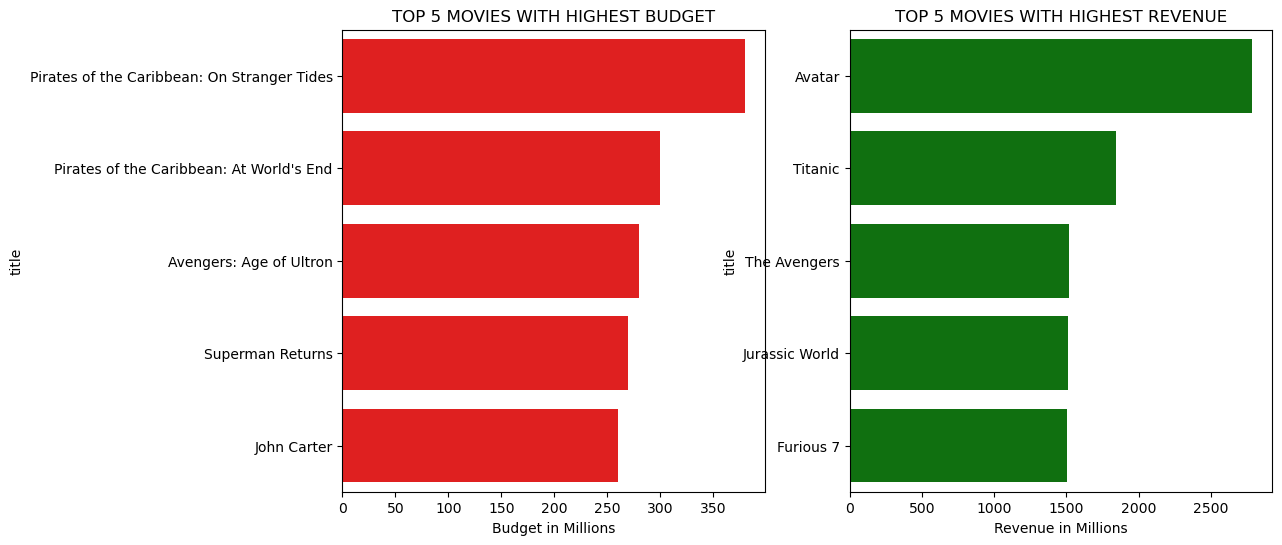

In [51]:
# Lets visualize the top 5 movies with highest budget and revenue using seaborn

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('TOP 5 MOVIES WITH HIGHEST BUDGET')
sns.barplot(y='title', x='budget', data=movies[['title', 'budget']].sort_values('budget', ascending=False).head(), color='red')
plt.xlabel('Budget in Millions')

plt.subplot(1,2,2)
plt.title('TOP 5 MOVIES WITH HIGHEST REVENUE')
sns.barplot(y='title', x='revenue', data=movies[['title', 'revenue']].sort_values('revenue', ascending=False).head(), color='green')
plt.xlabel('Revenue in Millions')
plt.show()


In [53]:
movies.columns

Index(['movie_id', 'title', 'cast', 'crew', 'budget', 'genres', 'id',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'vote_average', 'vote_count'],
      dtype='object')

In [55]:
# genres
# id
# keywords
# title
# overview
# cast_y
# crew

movies = movies[['id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']]

In [57]:
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [59]:
# Lets first explore the Genres column

movies['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4804    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4805    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4806    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4807                                                   []
4808                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4809, dtype: object

In [61]:
def convert(obj):
    L = []  # empty list
    for i in ast.literal_eval(obj): # ast.literal_eval() is used to convert string to list
        i['name']   # i is a dictionary
        L.append(i['name']) # append the name of the genre
    return L

In [63]:
movies['genres']=movies['genres'].apply(convert)

In [65]:
movies['keywords']

0       [{"id": 1463, "name": "culture clash"}, {"id":...
1       [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2       [{"id": 470, "name": "spy"}, {"id": 818, "name...
3       [{"id": 849, "name": "dc comics"}, {"id": 853,...
4       [{"id": 818, "name": "based on novel"}, {"id":...
                              ...                        
4804    [{"id": 5616, "name": "united states\u2013mexi...
4805                                                   []
4806    [{"id": 248, "name": "date"}, {"id": 699, "nam...
4807                                                   []
4808    [{"id": 1523, "name": "obsession"}, {"id": 224...
Name: keywords, Length: 4809, dtype: object

In [67]:
# same thing applied on keyword as well
movies['keywords'] = movies['keywords'].apply(convert)

In [69]:
movies.head(2)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [71]:
movies.columns

Index(['id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew'], dtype='object')

In [73]:
movies['cast']

0       [{"cast_id": 242, "character": "Jake Sully", "...
1       [{"cast_id": 4, "character": "Captain Jack Spa...
2       [{"cast_id": 1, "character": "James Bond", "cr...
3       [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4       [{"cast_id": 5, "character": "John Carter", "c...
                              ...                        
4804    [{"cast_id": 1, "character": "El Mariachi", "c...
4805    [{"cast_id": 1, "character": "Buzzy", "credit_...
4806    [{"cast_id": 8, "character": "Oliver O\u2019To...
4807    [{"cast_id": 3, "character": "Sam", "credit_id...
4808    [{"cast_id": 3, "character": "Herself", "credi...
Name: cast, Length: 4809, dtype: object

In [75]:
# Pick the only 1
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [79]:
def convert3(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter !=3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [81]:
movies['cast'] = movies['cast'].apply(convert3)

In [85]:
# Lets explore the crew column
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [87]:
def director(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [89]:
movies['crew'] = movies['crew'].apply(director)

In [91]:
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [93]:
movies['overview'] = movies.overview.apply(lambda x:x.split())

In [95]:
# Remove the spaces between the words
movies['genres'] = movies.genres.apply(lambda x : [i.replace(" " , "") for i in x])
movies['keywords'] = movies.keywords.apply(lambda x : [i.replace(" " , "") for i in x])
movies['cast'] = movies.cast.apply(lambda x : [i.replace(" " , "") for i in x])
movies['crew'] = movies.crew.apply(lambda x : [i.replace(" " , "") for i in x])

In [97]:
# Combine all the columns
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [99]:
movies.head(2)

,id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."


In [101]:
# Create our new dataset having vocabulary of the tags

df = movies[['id', 'title', 'tags']]

In [103]:
df.head()

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [105]:
# Convert the tags into string

df['tags'] = df['tags'].apply(lambda x: " ".join(x))

C:\Users\anoop\AppData\Local\Temp\ipykernel_14592\1494806033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(lambda x: " ".join(x))


In [107]:
df.tags

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: tags, Length: 4809, dtype: object

In [109]:
df.tags[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [111]:
# Ignore the Stopwords
cv = CountVectorizer(max_features=5000, stop_words='english') # max_features is used to take top 5000 words, stop_words is used to ignore the common words like 'is', 'the', 'a', 'an' etc

In [113]:
# Fit the tags into the CountVectorizer
vectors = cv.fit_transform(df['tags']).toarray()
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [117]:
ps = PorterStemmer()

In [119]:
def Stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))

    return  " ".join(y)

In [121]:
df['tags'] = df['tags'].apply(Stem)

C:\Users\anoop\AppData\Local\Temp\ipykernel_14592\1484374556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(Stem)


In [122]:
df.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [125]:
# Find the cosine similarity between the vectors
similarity = cosine_similarity(vectors)

In [127]:
similarity[0].shape

(4809,)

In [129]:
def recommend(movie):
    movie_index = df[df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:6]

    for i in movies_list:
        print(df.iloc[i[0]].title)
    return

In [131]:
recommend('Cars')

Cars 2
Marmaduke
Rango
The Simpsons Movie
Up


In [133]:
recommend('Ice Age')

Ice Age: The Meltdown
The Croods
Ice Age: Continental Drift
The Good Dinosaur
Dinosaur


In [141]:
df[df['title'] == 'Ice Age']

,id,title,tags
631,425,Ice Age,"with the impend ice age almost upon them, a mi..."
